In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from MTGA.MTGA import *

from MTGA.MTGAInstance import Instance
import MTGA.Generators as Generators
import MTGA.Mutators as Mutators
import MTGA.WeightGenerators as WeightGenerators
import Fixers as Fixers
import Evaluators as Evaluators

from MTGA.GeneVisualizer import GeneEvolutionRenderer

from ProblemDef import FirefighterProblem
from Utils import *


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Main Instance

In [3]:
instance = Instance("problems/p1.json",
    evaluator=Evaluators.CummulativeEvaluator(),
    mutator=Mutators.WalkMutator(),
    generator=Generators.Generator(),
    fixer=Fixers.ChoiceFixer(),
    weight_generator=WeightGenerators.SoftmaxWeights())

/home/jakub/.local/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


In [4]:
data = optimize_and_collect(instance, number_of_iterations=20)

[2025-01-30 16:09:42][  0]     0.72529626     0.72529364 {  1.00000000   3.07570000   8.00000000   1.18371006}
[2025-01-30 16:09:43][  1]     1.43097091     0.70419621 {  1.00000000   3.10580000   8.00000000   1.19908563}
[2025-01-30 16:09:43][  2]     2.12875652     0.69424105 {  1.00000000   3.08010000   8.00000000   1.18923673}
[2025-01-30 16:09:44][  3]     2.82628727     0.69605255 {  1.00000000   3.07380000   8.00000000   1.19680974}
[2025-01-30 16:09:45][  4]     3.52928567     0.70161057 {  1.00000000   3.04360000   8.00000000   1.13044197}
[2025-01-30 16:09:45][  5]     4.23591065     0.70267987 {  1.00000000   3.03290000   8.00000000   1.10236908}
[2025-01-30 16:09:46][  6]     4.96358514     0.72619939 {  1.00000000   2.99550000   8.00000000   1.02483157}
[2025-01-30 16:09:47][  7]     5.70193243     0.73663235 {  1.00000000   2.98540000   8.00000000   1.00378625}
[2025-01-30 16:09:48][  8]     6.41331768     0.70994329 {  1.00000000   2.95640000   8.00000000   0.95367659}
[

[0.274828] handling frame 0
[0.461678] handling frame 0
[1.272763] handling frame 1
[2.191839] handling frame 2
[3.002349] handling frame 3
[3.950493] handling frame 4
[5.060915] handling frame 5
[6.156403] handling frame 6
[7.085718] handling frame 7
[8.252752] handling frame 8
[9.200362] handling frame 9
[10.223495] handling frame 10
[11.326251] handling frame 11
[12.233956] handling frame 12
[13.021202] handling frame 13
[13.977730] handling frame 14
[14.716141] handling frame 15
[15.502970] handling frame 16
[16.381526] handling frame 17
[17.091759] handling frame 18
[17.794260] handling frame 19


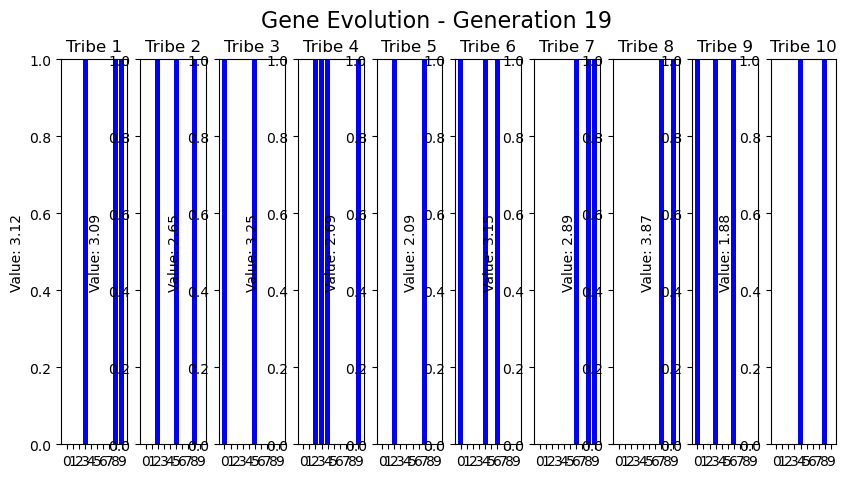

In [5]:
vis = GeneEvolutionRenderer(independent_ylim=False)
vis.visualize(data)
# vis.visualize(data, "output/p1_evolution_softmax_lim1.gif")

In [12]:
instance.solutions

[(array([False, False, False,  True, False,  True, False, False, False,
          True]),
  8),
 (array([False, False, False,  True, False,  True, False, False, False,
          True]),
  8),
 (array([False, False, False,  True, False,  True, False, False, False,
          True]),
  8),
 (array([False, False, False,  True, False,  True, False, False, False,
          True]),
  8),
 (array([False, False, False,  True, False,  True, False, False, False,
          True]),
  8),
 (array([False, False, False,  True, False,  True, False, False, False,
          True]),
  8),
 (array([False, False, False,  True, False,  True, False, False, False,
          True]),
  8),
 (array([False, False, False,  True, False,  True, False, False, False,
          True]),
  8),
 (array([False, False, False,  True, False,  True, False, False, False,
          True]),
  8),
 (array([False, False, False,  True, False,  True, False, False, False,
          True]),
  8),
 (array([False, False, False,  True, Fal

In [6]:
def check_range(r, correction_function):
    output = []
    for steepness in r:
        config = {
            'correction_function': correction_function,
            'correction_sigmoid_steepness': steepness,
            'number_of_iterations': 5
        }
            
        
        instance = Instance("problems/p1.json",
            evaluator=Evaluators.CummulativeEvaluator(),
            mutator=Mutators.WalkMutator(),
            generator=Generators.Generator(),
            fixer=Fixers.ChoiceFixer(),
            weight_generator=WeightGenerators.SoftmaxWeights())

        output_name = f"output/p1_evolution_testing_steepness.{steepness}.gif"

        data = optimize_and_collect(instance, **config)
        vis = GeneEvolutionRenderer(independent_ylim=False)
        output.append(vis.visualize(data))

In [7]:
# output = check_range([16, 32, 64, 128, 256], "sigmoid")

In [8]:
def render(steepness):
    instance = Instance("problems/p1.json",
        evaluator=Evaluators.CummulativeEvaluator(),
        mutator=Mutators.WalkMutator(),
        generator=Generators.Generator(),
        fixer=Fixers.ChoiceFixer(),
        weight_generator=WeightGenerators.SoftmaxWeights())
    
    data = optimize_and_collect(instance, number_of_iterations=5, print_updates=False, correction_function='smooth_clip')
    vis = GeneEvolutionRenderer(independent_ylim=False)
    return vis.visualize(data)

In [9]:
# midpoint=mean, small steepness
# render(0.001)

In [10]:
Utils.smooth_clip(4.1)

/media/foxinio/work/foxinio-work/Evo/project/FiremanProblemEAProject/Utils.py:77: RuntimeWarning: overflow encountered in exp
  return (1/steepness) * np.log(1 + np.exp(steepness * (x-lower_bound))) + lower_bound


inf

In [11]:
mtga = MTGA(instance)
current_genes = mtga.initialize_genes()
mtga.generate_population(current_genes)

array([[[False, False,  True, ..., False,  True, False],
        [False, False, False, ...,  True,  True, False],
        [ True, False, False, ..., False, False, False],
        ...,
        [False, False,  True, ..., False,  True,  True],
        [False, False, False, ..., False,  True,  True],
        [ True, False, False, ...,  True, False, False]],

       [[False,  True, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        [False,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ...,  True, False,  True],
        [ True,  True, False, ..., False, False, False],
        [False, False,  True, ..., False, False,  True]],

       [[False, False, False, ...,  True, False,  True],
        [False,  True,  True, ..., False, False, False],
        [False, False, False, ..., False, False,  True],
        ...,
        [False,  True, False, ..., False,  True,  True],
        [False, False, False, ..., False, Fal